In [27]:
import sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.metrics import confusion_matrix

def get_metrics(y_true, y_pred, labels=None):
    """ Compute various measures from a confusion matrix

    Args:
        y_true: a column of the true labels.
        y_pred: a column of the predicted labels.
    Returns:
        A dictionary of metrics.
    """
    conf_mat = confusion_matrix(y_true, y_pred, labels=labels)
    tn, fp, fn, tp = conf_mat.ravel()

    return {'accuracy'          :  (tp + tn)/(tp + tn + fp + fn),
            'balanced_accuracy' :  0.5*tn / (tn+fp) + 0.5*tp / (tp+fn),
            'specificity'       :  tn / (tn+fp),
            'sensitivity'       :  tp / (tp+fn),
             'ppv'              :  tp / (tp + fp),
             'npv'              :  tn / (tn + fn)}


## Overview - Tuning parameters

### What is a tuning parameter?

* A variable affecting the classifier/regressor.
* Not meaningful in a real-world sense.

### How to select tuning parameters

We use a grid search combined with cross validation to determine the best value/combination of tuning parameter(s).

1. Create a **grid** of feasible values/combinations of the tuning parameter(s),
2. Use cross validation to compare the performance of each parameter/combination, and
3. Select the parameter/combination with the best performance.

## Example 1 - Performing a grid search for a classifier

#### The Wisconsin breast cancer data set

We will be using the [Wisconsin breast cancer data set](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) to illustrate the basic process of training and testing a machine learning module with `sklearn`.

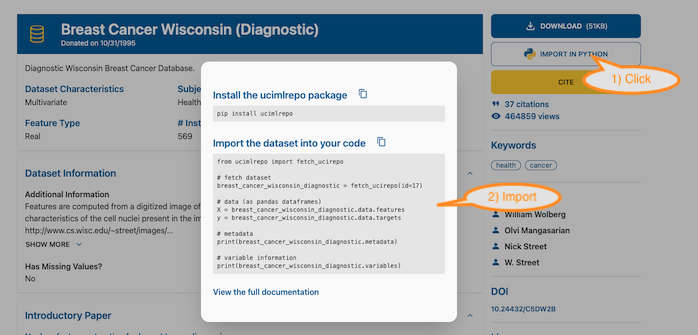

Note that you can find more information--as well as the code used to import the data--on the [UCI website page for the data](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).  Note that the data will be provided as a `pandas` (as opposed to a `polars`) data frame, which is fine for this exercise.

### Step 1 - The Set-up

#### Data

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### A model

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

#### A grid of parameters

In [17]:
import numpy as np

param_grid = {'max_depth': [None, 1,2,3,4,5],
              'min_samples_split' : [1, 5, 10],
               'min_samples_leaf' : [1, 5, 10],
              'class_weight':[None, "balanced"]
              }

param_grid

{'max_depth': [None, 1, 2, 3, 4, 5],
 'min_samples_split': [1, 5, 10],
 'min_samples_leaf': [1, 5, 10],
 'class_weight': [None, 'balanced']}

#### A fixed cross validation object

In [18]:
from sklearn.model_selection import StratifiedKFold

# A random state - I use random.org
state = 458

cv_obj = StratifiedKFold(n_splits=10, shuffle=True, random_state=state)
cv_obj

StratifiedKFold(n_splits=10, random_state=458, shuffle=True)

#### A grid search object combining all the previous parts.

In [19]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=3, cv=cv_obj)

### Step 2 - Performing the grid search

In [21]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1;, scor

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=458, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10]},
             verbose=3)

In [24]:
grid_search.best_score_

np.float64(0.9414728682170542)

In [25]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [23]:
best_model = grid_search.best_estimator_

best_model

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10)

### Step 3 - Measure the performance

#### Fit the model to the training data

In [31]:
y_test_pred = grid_search.predict(X_test)

y_test_pred

array(['B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M'],
      dtype=object)

In [32]:
get_metrics(y_test, y_test_pred)

{'accuracy': np.float64(0.9090909090909091),
 'balanced_accuracy': np.float64(0.9159090909090909),
 'specificity': np.float64(0.8863636363636364),
 'sensitivity': np.float64(0.9454545454545454),
 'ppv': np.float64(0.8387096774193549),
 'npv': np.float64(0.9629629629629629)}

## Comparing two models with tuning parameters

When picking between multiple models with tuning parameters, we will

1. Perform a grid search for each model using the same fixed CV object on the training set,
2. Select the best model/parameter combination as the winning model, and
3. Measure the final performance of the winning model using the test set.

### The problem - Difference shuffles for different models

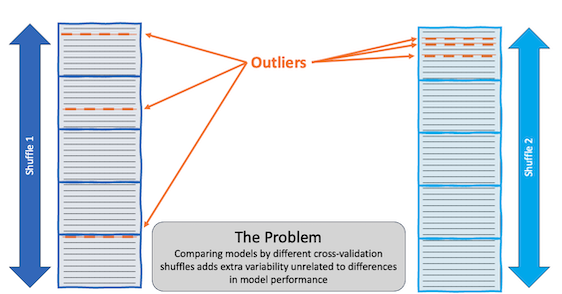

### The solution - Use the same shuffle to compare all models

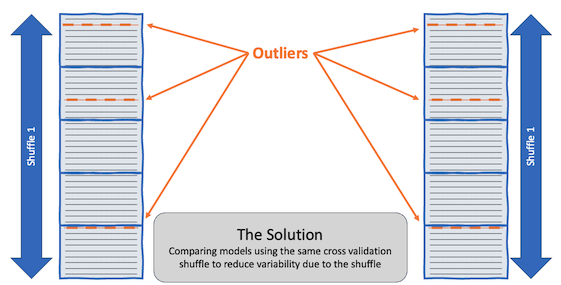


### Example picking the best tree or forest. 

Let's illustrate the process by comparing the best classification tree to the best random forest.

#### Model 1 - A classification trees.

In [35]:
# A classification tree
from sklearn.tree import DecisionTreeClassifier

**Note.** We will be using the `cv_obj` and best model `DecisionTreeClassifier` from the previous example.

#### Model 2 - A random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [42]:
rf_param_grid = {'n_estimators': 10 ** np.arange(1, 3),
              'max_depth': [None, 1,2,3,4,5],
              'min_samples_split' : [1, 5, 10],
               'min_samples_leaf' : [1, 5, 10],
              'class_weight':[None, "balanced"]
              }

rf_param_grid

{'n_estimators': array([ 10, 100]),
 'max_depth': [None, 1, 2, 3, 4, 5],
 'min_samples_split': [1, 5, 10],
 'min_samples_leaf': [1, 5, 10],
 'class_weight': [None, 'balanced']}

**Note.** It is important that the different models are selected using the same fixed CV object to minimize variability due to the shuffle.

In [43]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, verbose=3, cv=cv_obj)

rf_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_w

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=No

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_de

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=2, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=None, max_dept

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.977 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=2, min_s

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_lea

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.1s
[CV 2/10] END class_weight=None, max_de

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=3,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=3, m

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_d

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=3,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=4, min_sample

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=4,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=4, m

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_dept

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 2/10] END class_weight=None,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_dept

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=5, m

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, mi

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 10/10] END class_weight=None, max_dep

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_dept

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=None, 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=None,

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=None, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[C

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[C

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.884 tot

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.860 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.884 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.881 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 6/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_w

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] E

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 10/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.881 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.881 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 6

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END clas

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END cla

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 6/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_w

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.976 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 2/10] E

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END cla

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.976 total time=   0.0s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] 

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END cla

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 6

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=b

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END cla

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.0s
[CV 10/10] END class

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 10/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=4, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=b

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.977 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.884 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 7/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=ba

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.977 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 7/10] EN

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.977 total time=   0.1s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s
[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.929 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_wei

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.953 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.930 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.976 total time=   0.1s
[CV 1/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.0s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.0s
[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.905 total time=   0.0s
[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.0s
[CV 1

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 3/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.953 total time=   0.1s
[CV 4/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.930 total time=   0.1s
[CV 6/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV 7/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.952 total time=   0.1s
[CV 8/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=1.000 total time=   0.1s
[CV 9/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.1s
[CV 10/10] END class_weight=balanced, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.976 total time=   0.1s


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/polars/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=31487, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': array([ 10, 100])},
             verbose=3)

In [44]:
rf_grid_search.best_score_

np.float64(0.9648947951273532)

In [45]:
rf_grid_search.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': np.int64(10)}

In [46]:
rf_grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=np.int64(10))

#### Seeing the forest for the trees (Comparing the winning results for each).

In [47]:
grid_search.best_score_

np.float64(0.9414728682170542)

In [49]:
rf_grid_search.best_score_

np.float64(0.9648947951273532)

In [50]:
rf_grid_search.best_score_ > grid_search.best_score_

np.True_

#### Measuring the performance of the overall winning model on the test data.

In [51]:
y_test_pred_rf = rf_grid_search.predict(X_test)

In [52]:
get_metrics(y_test, y_test_pred_rf)

{'accuracy': np.float64(0.951048951048951),
 'balanced_accuracy': np.float64(0.946590909090909),
 'specificity': np.float64(0.9659090909090909),
 'sensitivity': np.float64(0.9272727272727272),
 'ppv': np.float64(0.9444444444444444),
 'npv': np.float64(0.9550561797752809)}

## <font color="red"> Exercise 2.6.4 </font>

**Task - Grid search for regression.**

Compare the efficacy of two models, the best tree and the best forest:

1. Find the best decision tree regression model using a grid search over a range of parameters,
2. Find the best random forest regression model using a grid search over a range of parameters,
3. Determine the overall best model between the two, and
4. Measure the performance for this best model on the test set.

Explain your choices.

In [1]:
# Your code here (add cells as needed)


<font color="orange">
    Your conclusion here
</font>